# Fluffy_Toys Stock Data Analysis

## Task Summary:
### The Project is to analyze stock data for a company named Fluffy Toys over a 12-year period as a junior finance analyst at Stock & Shares Plc. The overall goal is to understand stock price behavior and provide insights for predicting future trends.

# Import Libraries

In [1]:
# Inititally we import all the essential Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels as sm
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Importing data and performing initial Exploratory Data Analysis

In [3]:
# Now we load the dataset using pandas as a data frame
# Our data is in csv format. Here we have assigned it to datframe as 'df'.
df = pd.read_csv(r'Fluffy_Toys_LTD_Data_Set_4048.csv')

# Now we look at the first 5 rows of our data frame, in order to get an overview about what is in our data.
df.head(5)

,Date,Open,High,Low,Close,Volume,Name
0,01/03/2006,39.69,41.22,38.79,40.91,24232729,Fluffy
1,01/04/2006,41.22,41.90,40.77,40.97,20553479,Fluffy
2,01/05/2006,40.93,41.73,40.85,41.53,12829610,Fluffy
3,01/06/2006,42.88,43.57,42.80,43.21,29422828,Fluffy
4,01/09/2006,43.10,43.66,42.82,43.42,16268338,Fluffy


In [5]:
df.info() # Checking data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3019 non-null   object 
 1   Open    3013 non-null   float64
 2   High    3016 non-null   float64
 3   Low     3015 non-null   float64
 4   Close   3014 non-null   float64
 5   Volume  3019 non-null   int64  
 6   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 165.2+ KB


In [7]:
df.describe() # Looking at statistics summary of numerical columns

,Open,High,Low,Close,Volume
count,3013.000000,3016.000000,3015.000000,3014.000000,3.019000e+03
mean,28.417677,28.768352,28.076299,28.399121,2.158391e+07
std,13.243194,13.361062,13.162500,13.234456,1.926231e+07
min,9.100000,9.480000,8.940000,8.950000,1.939061e+06
25%,16.170000,16.380000,15.970000,16.130000,1.248025e+07
50%,27.180000,27.490000,26.830000,27.105000,1.732130e+07
75%,36.660000,37.027500,36.310000,36.622500,2.512757e+07
max,73.020000,73.250000,72.460000,72.930000,4.382317e+08


In [9]:
# Checking for number of missing values in each column to decide what we should do with the missing values
df.isnull().sum()  

Date      0
Open      6
High      3
Low       4
Close     5
Volume    0
Name      0
dtype: int64

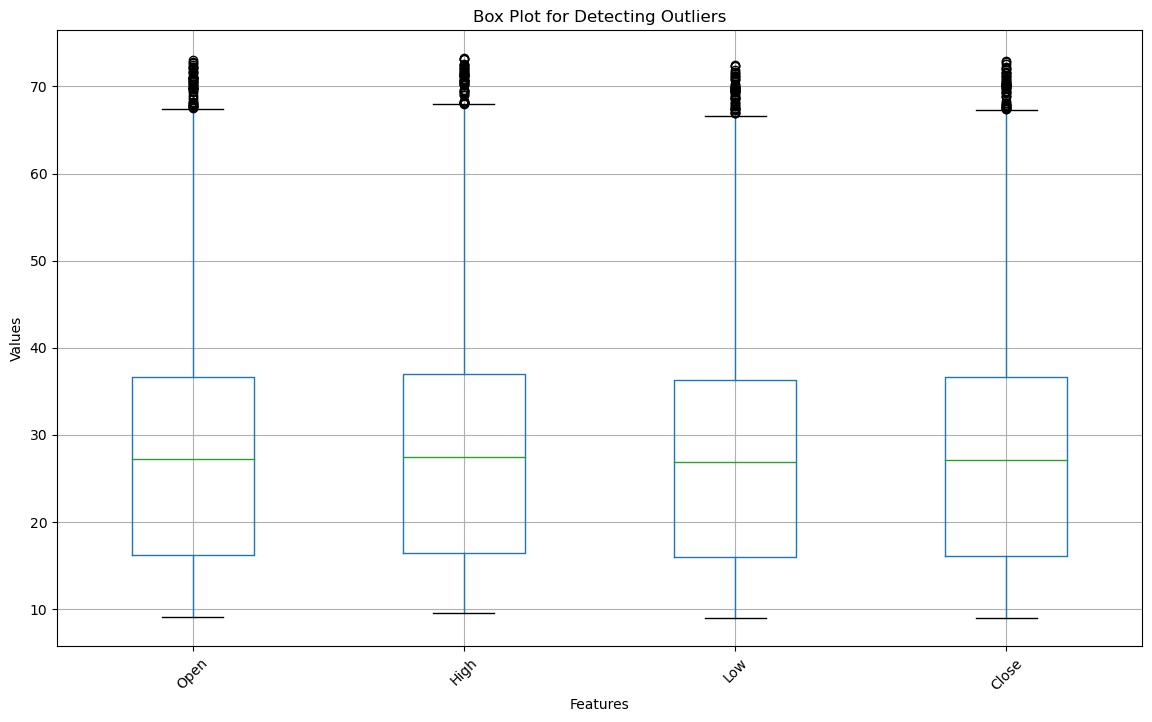

In [14]:
# Defining the columns for which to check for outliers
columns_to_check = ['Open', 'High', 'Low', 'Close']

# Creating box plots for each column to visualize outliers
plt.figure(figsize=(14, 8))
df[columns_to_check].boxplot()
plt.title("Box Plot for Detecting Outliers")
plt.ylabel("Values")
plt.xlabel("Features")
plt.xticks(rotation=45)
plt.show()

# Data Cleaning/Data Preprocessing/Data Trasnformation

In [21]:
df.drop('Name', axis=1, inplace=True)
df.head()

,Date,Open,High,Low,Close,Volume
0,01/03/2006,39.69,41.22,38.79,40.91,24232729
1,01/04/2006,41.22,41.90,40.77,40.97,20553479
2,01/05/2006,40.93,41.73,40.85,41.53,12829610
3,01/06/2006,42.88,43.57,42.80,43.21,29422828
4,01/09/2006,43.10,43.66,42.82,43.42,16268338


In [23]:
# Let's Change the data type of 'Date' Column to datetime format
df['Date'] = pd.to_datetime(df['Date']) 
# Now making the date column as index of our dataframe
df.set_index('Date', inplace=True)

df.head(3)  # Viwing first few rows of our data frame to confirm

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729
2006-01-04,41.22,41.90,40.77,40.97,20553479
2006-01-05,40.93,41.73,40.85,41.53,12829610


In [25]:
# Using .interpolate() method we will replace the missing values with interpolated values.
df[['Open', 'Close', 'High','Low']] = df[['Open', 'Close', 'High', 'Low']].interpolate(method='linear')

# Now Let's check to confirm if all the missing values have been replaced
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [27]:
# Select the columns to normalize (assuming they're numeric columns)
columns_to_normalize = ['Open', 'High', 'Low', 'Close', 'Volume']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply z-score normalization
df_normalized = df.copy()
df_normalized[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Display the first few rows to confirm the changes
print(df_normalized.head())

                Open      High       Low     Close    Volume
Date                                                        
2006-01-03  0.849734  0.932535  0.815155  0.942766  0.137536
2006-01-04  0.965164  0.983455  0.965666  0.947292 -0.053504
2006-01-05  0.943285  0.970725  0.971747  0.989537 -0.454554
2006-01-06  1.090401  1.108509  1.119977  1.116270  0.407024
2006-01-09  1.106999  1.115248  1.121497  1.132111 -0.276003


# Data Analytics

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'Open'),
  Text(0, 1.5, 'Close'),
  Text(0, 2.5, 'High'),
  Text(0, 3.5, 'Low'),
  Text(0, 4.5, 'Volume')])

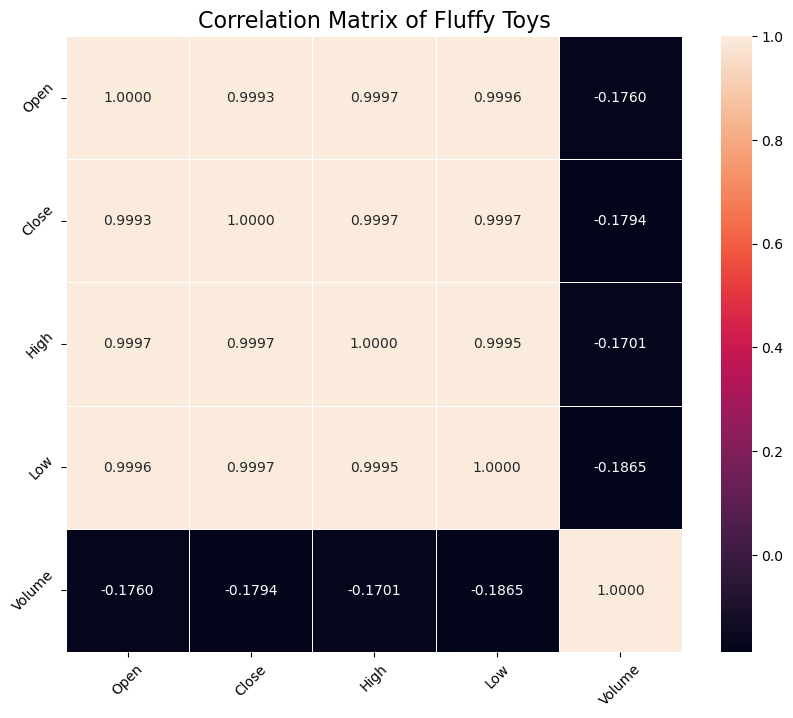

In [29]:
# We will start by looking at the correlation between variables
correlation_matrix = df[['Open', 'Close', 'High','Low','Volume']].corr()

plt.figure(figsize=(10, 8)) # This sets up the matplotlib figure

# This creates a heatmap with the correlation_matrix above
sns.heatmap(correlation_matrix, annot=True, fmt=".4f", square=True, linewidths=.5)
# We have set our results to 4 decimal places to look at the difference much closely

# Here we add title to our heatmap
plt.title('Correlation Matrix of Fluffy Toys', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

In [31]:
df['Year'] = df.index.year  # Create a new column 'Year' that extracts the year from the index
# Grouping by the 'Year' column and calculating the mean for columns
yearly_averages = df.groupby('Year')[['Open', 'Close', 'High', 'Low', 'Volume']].mean()

# Reset the index to make 'Year' a column again
yearly_averages.reset_index(inplace=True)  # Converts the 'Year' from the index back to a regular column

# Let's look at the yearly_averages dataframe
yearly_averages

,Year,Open,Close,High,Low,Volume
0,2006,30.037629,29.953625,30.401036,29.600378,2.389532e+07
1,2007,27.566892,27.525657,27.940837,27.152171,2.670887e+07
2,2008,21.188024,21.154901,21.600336,20.711423,3.382231e+07
3,2009,14.871071,14.868492,15.109603,14.612698,2.345691e+07
4,2010,15.591315,15.585777,15.779124,15.394781,2.226781e+07
5,2011,15.606806,15.591786,15.831190,15.369643,2.776507e+07
6,2012,15.995520,15.996600,16.136360,15.857440,1.861078e+07
7,2013,27.717222,27.741389,28.047817,27.408571,1.816437e+07
8,2014,39.456369,39.444206,39.924484,38.955754,2.417230e+07
9,2015,39.050714,38.971389,39.458889,38.545198,1.563988e+07


In [33]:
# Renaming our columns in yearly_averages for better understanding
yearly_averages.rename(columns={'Open': 'Open_Avg','Close': 'Close_Avg','High': 'High_Avg','Low': 'Low_Avg', 'Volume': 'Volume_Avg'}, inplace=True)

yearly_averages.head(3) # Viewing first 3 rows to confirm

,Year,Open_Avg,Close_Avg,High_Avg,Low_Avg,Volume_Avg
0,2006,30.037629,29.953625,30.401036,29.600378,2.389532e+07
1,2007,27.566892,27.525657,27.940837,27.152171,2.670887e+07
2,2008,21.188024,21.154901,21.600336,20.711423,3.382231e+07


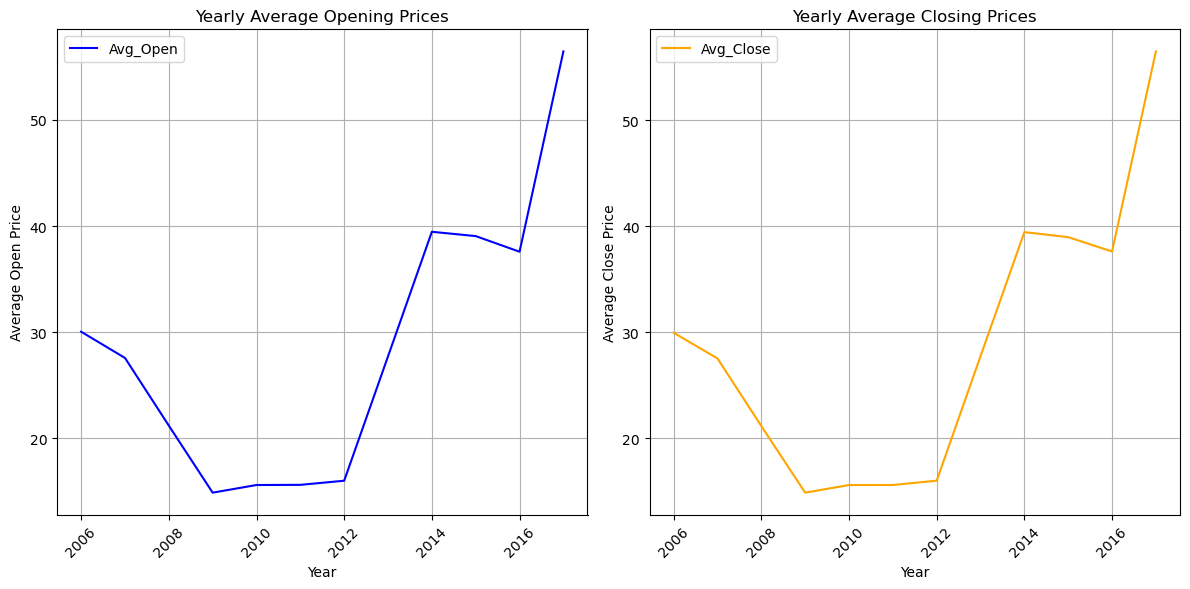

In [35]:
# Let's do a comparitive study between closing average price and opening average price using visualization
# Creating subplots with 1 row, 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the first line on the first subplot
axs[0].plot(yearly_averages['Year'], yearly_averages['Open_Avg'], label='Avg_Open', color='blue')
axs[0].set_title('Yearly Average Opening Prices')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Average Open Price')
axs[0].grid()
axs[0].legend()
axs[0].tick_params(axis='x', rotation=45)

# Plotting the second line on the second subplot
axs[1].plot(yearly_averages['Year'], yearly_averages['Close_Avg'], label='Avg_Close', color='orange')
axs[1].set_title('Yearly Average Closing Prices')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Average Close Price')
axs[1].grid()
axs[1].legend()
axs[1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

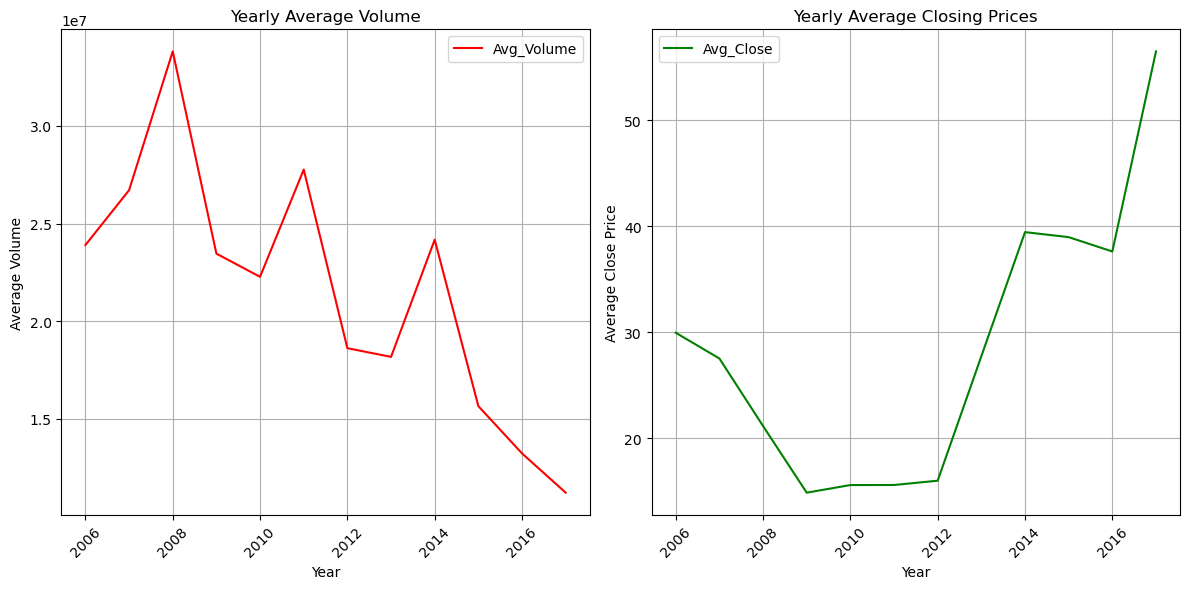

In [37]:
# Now Let's plot average volume and average closing price side by side to see if volume has any influence on alosing price
# Creating subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the average volume on the first subplot
axs[0].plot(yearly_averages['Year'], yearly_averages['Volume_Avg'], label='Avg_Volume', color='red')
axs[0].set_title('Yearly Average Volume')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Average Volume')
axs[0].grid()
axs[0].legend()
axs[0].tick_params(axis='x', rotation=45)

# Plotting the avergae closing price on the second subplot
axs[1].plot(yearly_averages['Year'], yearly_averages['Close_Avg'], label='Avg_Close', color='green')
axs[1].set_title('Yearly Average Closing Prices')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Average Close Price')
axs[1].grid()
axs[1].legend()
axs[1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

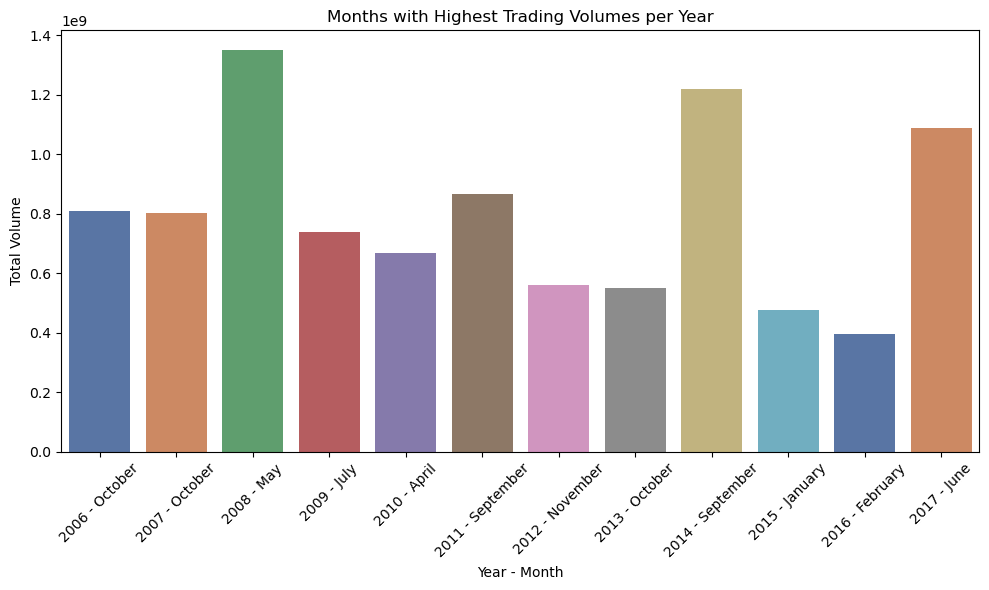

In [39]:
# Now let's look at months in which we had highest trading volume over the years
df['Month'] = df.index.month # creating month column. Extracts month from date index
df['Year'] = df.index.year # creating year column. Extracts year from date index

# Grouping by Year and Month, and sum the volumes
monthly_volume = df.groupby(['Year', 'Month'])['Volume'].sum().reset_index()

# Getting the month with the highest volume for each year
highest_months = monthly_volume.loc[monthly_volume.groupby('Year')['Volume'].idxmax()]

# Converting month number to month name for better readability
highest_months['Month Name'] = highest_months['Month'].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%B'))

# Creating a combined Year-Month label for the x-axis
highest_months['Year-Month'] = highest_months['Year'].astype(str) + ' - ' + highest_months['Month Name']

# Plotting barplot using Seaborn library
plt.figure(figsize=(10, 6)) # Inititalize figure
sns.barplot(x=highest_months['Year-Month'], y=highest_months['Volume'], palette='deep')

plt.title('Months with Highest Trading Volumes per Year')
plt.xlabel('Year - Month')
plt.ylabel('Total Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [41]:
# Now let's perform some statistical tests
# First we calculate the standard deviation of the closing prices
std_dev = df['Close'].std()

# Print the standard deviation
print(f'Standard Deviation of Closing Prices: {std_dev:.3f}')

Avg_close = df['Close'].mean() # Calculating average closing price

# Print the average
print(f'Average of Closing Prices: {Avg_close:.3f}')

# Now let's measure the volatility using standard deviation and mean
Volatility = (std_dev/Avg_close)*100
# Print the Volatility
print(f'\nVolatility: {Volatility:.2f}%')

Standard Deviation of Closing Prices: 13.258
Average of Closing Prices: 28.413

Volatility: 46.66%


In [43]:
# Now we perform some hypothesis testing using t-test methodology
# Calculate the mean of opening and closing prices
mean_open = df['Open'].mean()
mean_close = df['Close'].mean()

print(f'Mean Opening Price: {mean_open}')
print(f'Mean Closing Price: {mean_close}')

# Perform the paired t-test between 'Open' and 'Close' prices
t_statistic, p_value = stats.ttest_rel(df['Open'], df['Close'])

# Displaying the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Interpret the results as reject or fail to reject null hypothesis
alpha = 0.05  # significance level
if p_value < alpha:
    print("\nReject the null hypothesis (H0): There is a significant difference between the average opening and closing prices.")
else:
    print("\nFail to reject the null hypothesis (H1): There is no significant difference between the average opening and closing prices.")

Mean Opening Price: 28.426894667108314
Mean Closing Price: 28.412524014574362
T-statistic: 1.6166637457102853
P-value: 0.10605539599227995

Fail to reject the null hypothesis (H1): There is no significant difference between the average opening and closing prices.


# Predictive Analysis

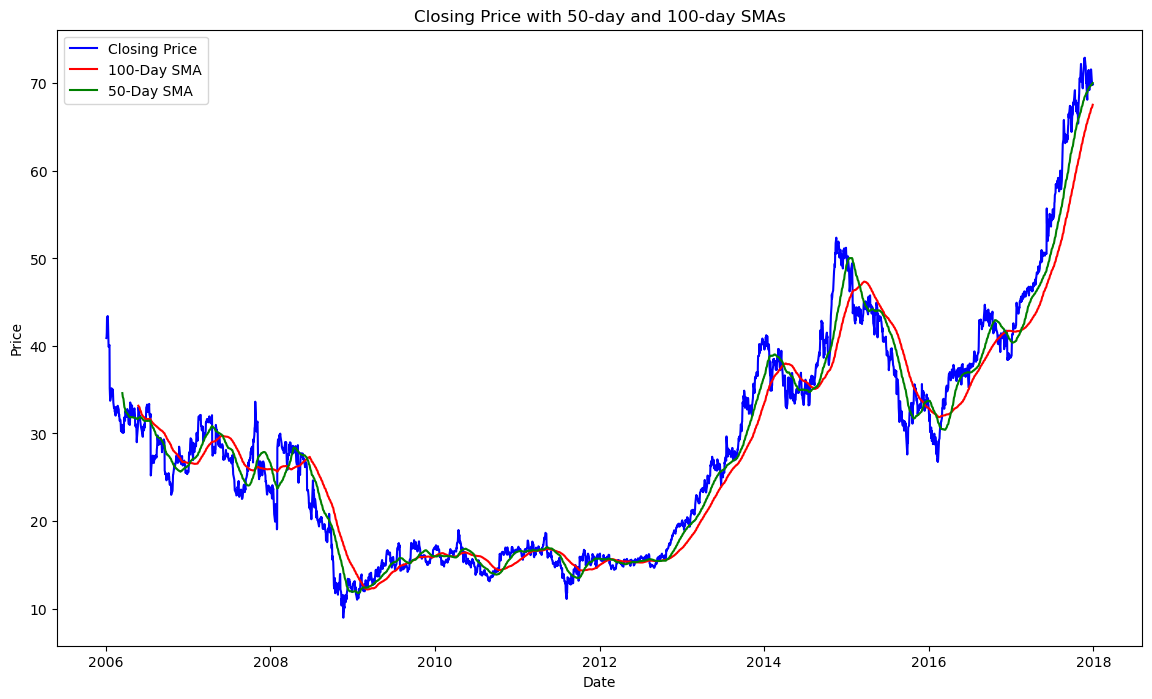

In [45]:
# Calculate the 100-day and 50-day simple moving averages
df['100_SMA'] = df['Close'].rolling(window=100).mean()
df['50_SMA'] = df['Close'].rolling(window=50).mean()

# Plot the closing price along with the 100-day and 50-day SMAs
plt.figure(figsize=(14, 8))
plt.plot(df['Close'], label="Closing Price", color="blue")
plt.plot(df['100_SMA'], label="100-Day SMA", color="red")
plt.plot(df['50_SMA'], label="50-Day SMA", color="green")

# Customize the plot
plt.title("Closing Price with 50-day and 100-day SMAs")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


In [47]:
from sklearn.metrics import mean_squared_error
# Use only 'Close' price to predict future values; shift it by 1 day to make it a target
df['Target_Close'] = df['Close'].shift(-1)  # Shift 'Close' to create target for next day prediction
df.dropna(inplace=True)  # Drop the last row with NaN target after shifting

# Features and target
X = df[['Close']].values  # Using 'Close' prices as the feature
y = df['Target_Close'].values

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error for evaluation
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error is: ', mse)
print(f"Since the stock prices average around 30, an MSE of {mse} suggests relatively low average squared error, indicating good predictive performance.")

Mean Squared Error is:  0.5278554617032504
Since the stock prices average around 30, an MSE of 0.5278554617032504 suggests relatively low average squared error, indicating good predictive performance.


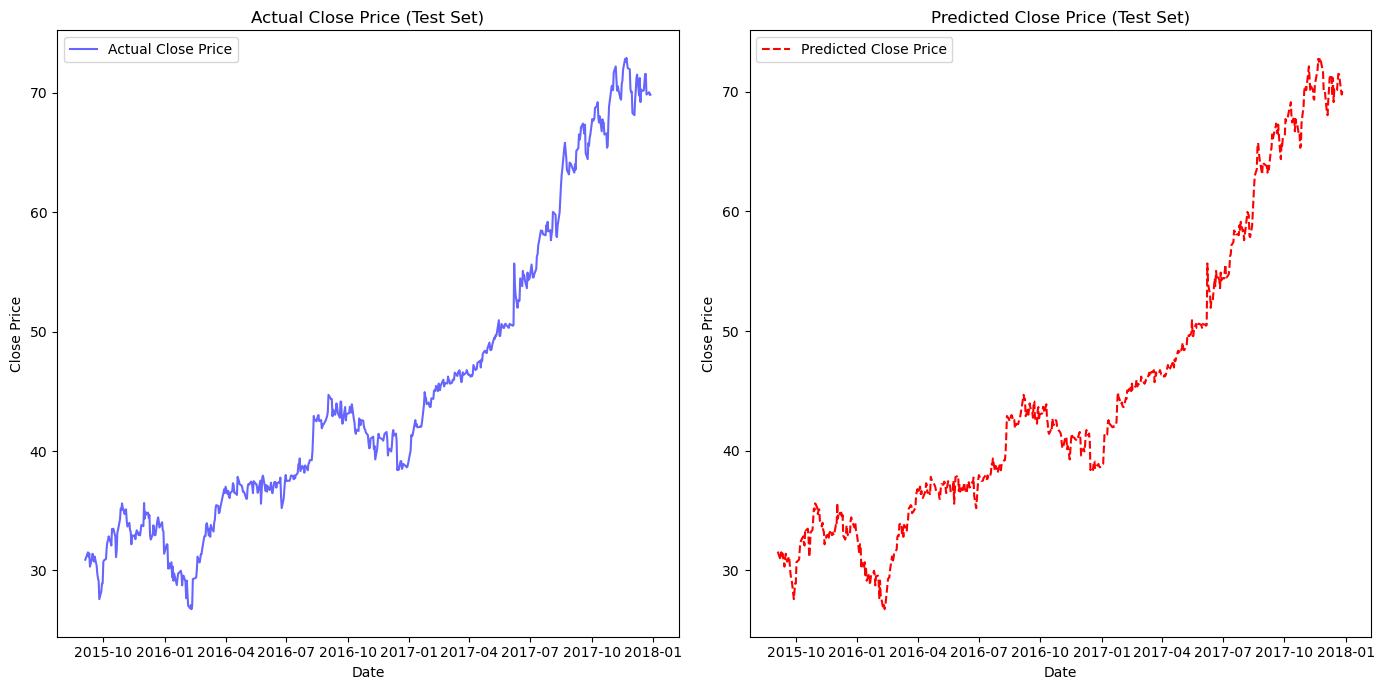

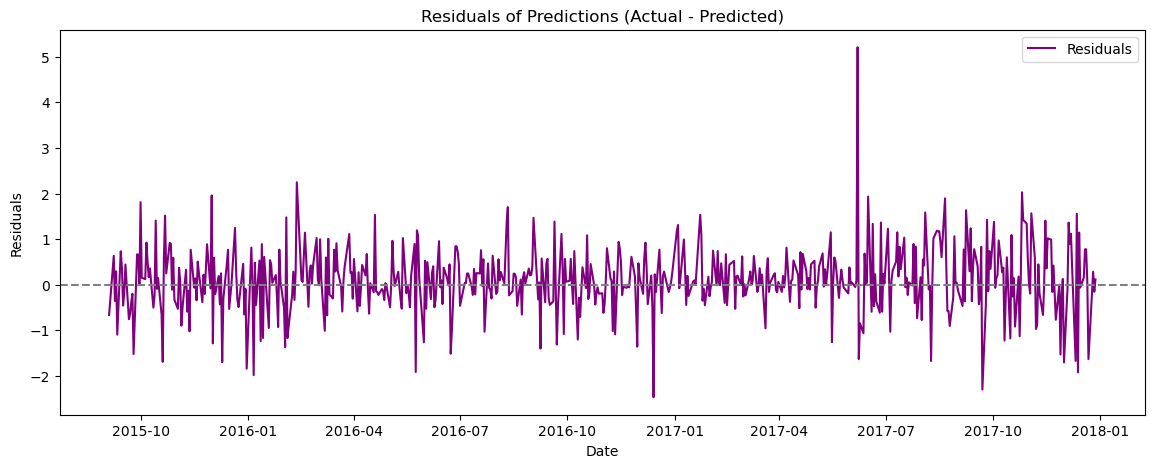

In [49]:
# Create a 1x2 subplot layout (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Plot Actual Close Price on the first subplot
ax1.plot(df.index[-len(y_test):], y_test, label="Actual Close Price", color="blue", alpha=0.6)
ax1.set_title("Actual Close Price (Test Set)")
ax1.set_xlabel("Date")
ax1.set_ylabel("Close Price")
ax1.legend()

# Plot Predicted Close Price on the second subplot
ax2.plot(df.index[-len(y_test):], y_pred, label="Predicted Close Price", color="red", linestyle="--")
ax2.set_title("Predicted Close Price (Test Set)")
ax2.set_xlabel("Date")
ax2.set_ylabel("Close Price")
ax2.legend()

# Adjust the layout to avoid overlapping elements
plt.tight_layout()

# Show the plot
plt.show()
# Plot of residuals (difference between actual and predicted prices)
residuals = y_test - y_pred
plt.figure(figsize=(14, 5))
plt.plot(df.index[-len(y_test):], residuals, label="Residuals", color="purple")
plt.axhline(y=0, color="gray", linestyle="--")
plt.title("Residuals of Predictions (Actual - Predicted)")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.legend()
plt.show()

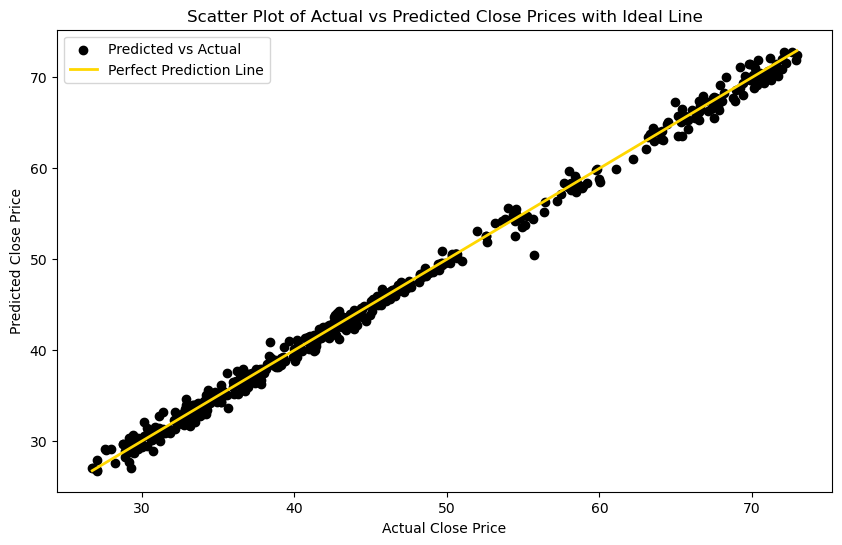

In [73]:
# Scatter plot of actual vs predicted close prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color="black", label="Predicted vs Actual")

# Plot a line to indicate the ideal prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="gold", label="Perfect Prediction Line", linewidth=2)

# Adding labels and title
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Scatter Plot of Actual vs Predicted Close Prices with Ideal Line")
plt.legend()
plt.show()